# TP Chaines de Markov

## 1- Génération d'une variable aléatoire discrète

### Exemple : 
On se place sur un espace fini, disons 
$$
E= \{ Rouge; Bleu; Vert\}
$$

On souhaite simuler une variable aléatoire de loi:
$$
\begin{array}{c|ccc}
X & Rouge & Bleu & Vert \\
\hline
\mathbb{P}(X=k) & \frac{1}{2} & \frac{1}{3} & \frac{1}{6}
\end{array}
$$

Pour cela, on se sert de la fonction Python
$$ np.random.uniform(0,1) $$
qui génère une loi uniforme sur [0,1]

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#Exemple 
x=np.random.uniform(0,1)
if x <= 1/2 :
    print("Rouge");
elif x<= 5/6 :
    print("Bleu");
else: print("Vert");

Bleu


### Exercice 1:
- Expliquer pourquoi l'exemple précédent fonctionne : 
<br> P("Rouge") = 1/2 = P(x <= 1/2)
<br> P("Bleu") = 1 - P("Rouge") - P("Vert") = 1/6 = P(x <= 5/6)
<br>

- Écrire une fonction "Simu" qui prend en entrée un vecteur de probabilité $$\mu=(p_0~~\ldots ~~ p_n)$$ et qui simule une observation d'une variable aléatoire $X$ telle que $\mathbb{P}(X=k)=p_k$ :

(array([123., 206., 371.]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <BarContainer object of 3 artists>)

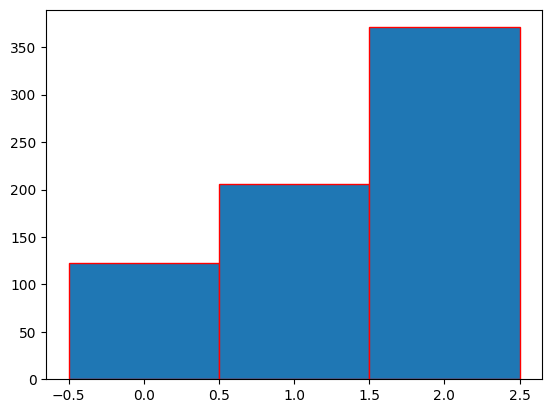

In [3]:
# Ecrire votre code ici :
def Simu(mu):
    n = len(mu)
    s = 0
    x = np.random.uniform(0,1)
    for i in range(n):
        if s <= x <= s + mu[i]:
            return i
        else:
            s += mu[i]
Vect = []
for i in range(700):
    Vect.append(Simu([0.2,0.3,0.5]))

plt.hist(Vect,range = (-0.5,2.5), bins = 3, edgecolor = "red")    


## 2- Application à la génération d'une chaine de Markov

### Exemple:

On considère la chaine de Markov sur $\{0,1,2\}$ de matrice de transition
$$P= \begin{pmatrix} 0 & 0.1 & 0.9 \\ 0.1 & 0 & 0.9 \\ 0.5 & 0.5 & 0 \end{pmatrix}$$

On rappelle que si $\mu_n$ désigne la loi de $X_n$, c'est à dire:
$$
\mu_n= 
\begin{pmatrix}\mathbb{P}(X_n=0)& \mathbb{P}(X_n=1)& \mathbb{P}(X_n=2)
\end{pmatrix}
$$


Alors, on a la relation:
$$
\mu_{n+1} = \mu_{n}P
$$

Prenons $X_0$ de loi 
$$
\mu_0 = \begin{pmatrix}
\frac{1}{2}& \frac{1}{3}& \frac{1}{6}
\end{pmatrix}
$$

In [115]:
# Simulation de 10 pas dans la chaine de Markov:

Mkv=[];


# Génération de X_0:
x=np.random.uniform(0,1)
if x <= 0.5 :
    Mkv.append(0)
elif x<= 5/6 :
    Mkv.append(1)
else: Mkv.append(2)



# Matrice de transition:
P = np.array([[0, 0.1, 0.9],
              [0.1, 0, 0.9],
              [0.5, 0.5, 0.0]])
    

for i in range(10):
    # On sélectionne la ligne de P correspondant à l'état dans lequel est la chaine
    State = Mkv[-1]
    proba= P[State,:]
    
    x=np.random.uniform(0,1)
    # On tire un nouvel état pour la chaine.
    if x <= proba[0] :
        Mkv.append(0)
    elif x<= proba[0]+proba[1] :
        Mkv.append(1)
    else: Mkv.append(2)


print(Mkv)


[0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0]



### Exercice 2: 
-S'approprier le code ci dessus. On pourra par exemple:
    - Faire varier le nombre de pas dans la chaine de Markov
    - Changer la matrice de transition et/ou la probabilité initiale

### Exercice 3: 
On souhaite simuler une chaîne de Markov sur $\{0,\ldots,n\}$. 
- Écrire une fonction "Markov" qui prend en paramètres:
    - une loi initiale, 
    - une matrice de transition,
    - un nombre $n$ de pas à simuler 
  <br>
  <br>
  et qui retourne un vecteur contenant les $n+1$  états parcourus par la chaine de Markov.

In [85]:
# écrire votre code ici
def Markov(loi, P, n):
    d = len(P)
    X = []
    X.append(random.choices(range(len(loi)),weights = loi, k = 1))
    for i in range(n):
        State = X[-1]
        proba = P[State,:]
        proba = np.array(proba)
        proba = [i for j in proba for i in j]
        try:
            X.append(random.choices(range(d), weights = proba, k = 1))
        except ValueError:
            print(proba)
    return X

In [73]:
def Affiche_Markov(loi, P, n):
    Vect = Markov(loi = loi, P = P, n = n)
    Vect = np.array(Vect)
    Vect = np.concatenate(Vect)
    plt.hist(Vect, range = (-0.5, float(len(P)) - 0.5), bins = 4, edgecolor = 'red')
    print(Vect)

### Représentation et Visualisation

On peut chercher à représenter la trajectoire en fonction du nombre de pas:

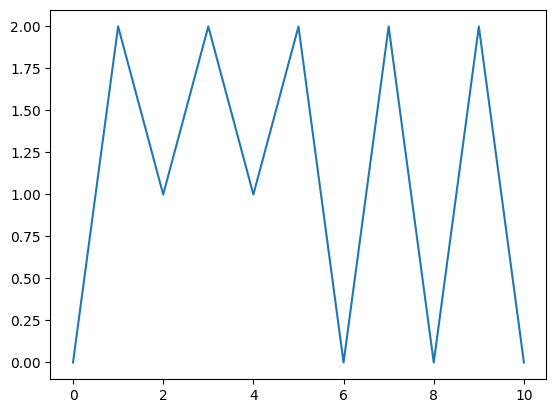

In [116]:
Niter=range(11)
plt.plot(Niter,Mkv)

On voit qu'en temps long, ce genre de graphique n'est pas très utile. 
À la place, on dessine un histogramme:

(array([4., 2., 5.]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <BarContainer object of 3 artists>)

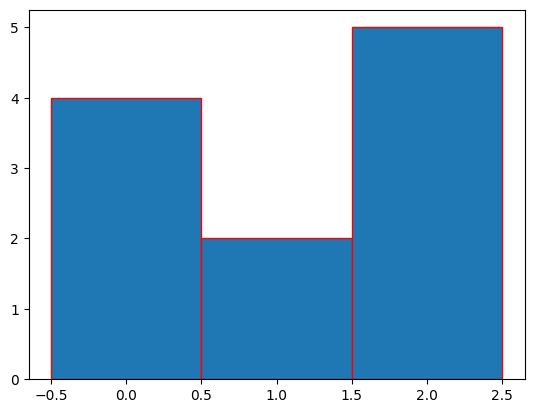

In [117]:
plt.hist(Mkv, range = (-0.5, 2.5), bins = 3,edgecolor = 'red')

### Exercice 4:

- Se servir du code écrit à l'exercice 3 pour simuler $N$ pas d'une chaîne de Markov $(X_n)_{n \ge 0}$ et représenter l'histogramme obtenu pour différentes valeurs de $N$ 
<br>
On prendra différentes matrices de transitions et lois initiales donnant
    - une chaine irréductible, récurrente et apériodique,
    - une chaine avec plusieurs états transitoires et une seule classe récurrente,
    - un chaine avec plusieurs classes récurrentes,
<br>
<br>
- Pour chaque exemple, illustrer en faisant plusieurs simulations avec différents choix de loi initiale, le comportement de la chaîne de Markov et commenter les résultats obtenus.

#### Une simulation de chaine irréductible, récurrente et apériodique :

[3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3
 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1
 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2
 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3
 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1
 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2
 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3
 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1
 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2
 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3
 0 1 2 3 0 1 2 3 0 1 2 3 

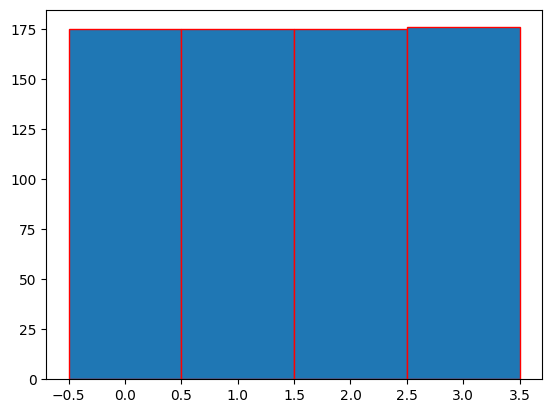

In [86]:
# écrire votre code ici
loi = [0.23, 0.37, 0.12, 0.28]
P_ira = np.array([[0.5,0.5,0,0],
                [0,0.5,0.5,0],
                [0, 0, 0.5, 0.5],
                [0.5, 0, 0, 0.5]])
P_ptr = np.array([[0.5,0.4,0.1,0],
                [0.4,0.5,0.1,0],
                [0.4,0.4,0.1,0.1],
                [0,0,0,1]])
P_pr = np.array([[0,1,0,0],
               [0,0,1,0],
               [0,0,0,1],
               [1,0,0,0]])
assert(P_ira.shape[1] == P_ira.shape[0])
assert(P_ptr.shape[1] == P_ptr.shape[0])
assert(P_pr.shape[1] == P_pr.shape[0])


Affiche_Markov(loi = loi, P = P_pr, n = 700)

[0 0 0 0 1 1 1 2 3 0 0 0 1 1 1 2 2 3 3 0 1 2 2 3 3 3 0 0 1 1 1 1 2 2 2 3 0
 1 2 3 3 0 1 1 1 1 1 1 1 2 2 3 3 3 0 1 2 2 2 3 3 0 1 2 2 3 3 3 3 3 0 0 1 1
 2 3 0 1 2 2 2 3 3 0 1 1 2 3 3 3 0 1 2 3 0 1 1 2 2 3 0 0 0 0 1 2 2 2 2 2 3
 3 3 0 1 1 2 3 3 0 1 2 3 3 3 3 0 0 0 0 1 2 3 3 3 3 3 3 0 1 1 1 2 2 3 3 3 0
 1 2 3 3 3 3 3 3 0 0 0 1 2 3 0 1 2 2 2 3 3 3 3 3 0 0 1 1 2 2 2 2 2 3 0 0 1
 2 2 3 3 3 3 0 1 1 1 2 2 3 3 3 0 1 1 2 3 0 1 2 3 3 0 0 0 0 0 0 1 2 2 2 3 0
 0 1 1 1 2 3 0 1 1 2 2 3 0 1 1 1 1 2 3 3 3 0 0 1 1 1 2 3 0 1 1 2 3 0 1 2 2
 3 3 3 0 1 1 2 2 2 2 3 0 0 1 2 2 3 0 1 2 3 3 0 0 1 1 2 2 2 2 2 3 0 1 1 1 2
 2 3 3 0 0 0 1 1 1 2 3 0 1 2 2 2 3 0 0 1 2 3 0 1 2 3 3 3 0 1 1 1 2 2 2 3 3
 0 0 1 2 3 0 1 2 3 0 0 1 1 1 2 2 2 3 0 1 2 3 3 0 1 1 1 1 1 2 2 3 3 0 1 1 2
 3 3 3 3 0 1 2 3 3 0 1 1 1 2 3 0 0 1 1 2 3 0 1 1 1 1 1 2 2 3 3 3 3 3 0 0 1
 2 2 3 0 0 0 1 2 3 0 0 1 1 1 1 1 2 2 3 3 3 0 1 2 2 2 2 3 3 0 0 1 2 3 0 1 1
 2 3 3 3 3 0 0 0 0 1 1 1 1 1 2 2 3 0 0 0 1 2 3 3 3 0 1 1 1 1 1 2 2 3 0 1 1
 1 1 2 2 3 0 1 2 2 2 2 3 

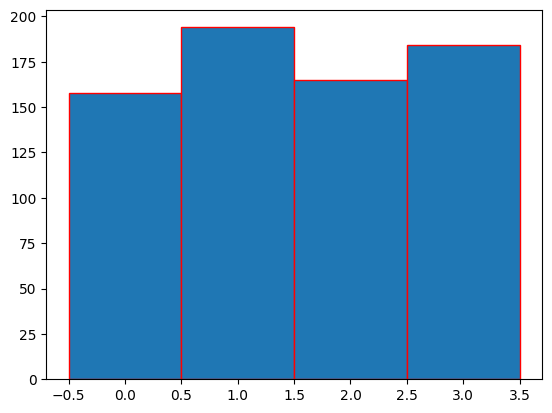

In [87]:
Affiche_Markov(loi = loi, P = P_ira, n = 700)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

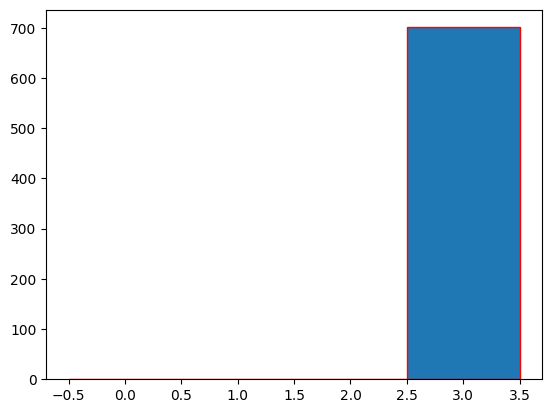

In [88]:
Affiche_Markov(loi = loi, P = P_ptr, n = 700)

#### Commentaires :
#### Une simulation de chaine comportant plusieurs états transitoires  et une seule classe récurrente : $\mathbb{E}[T_x(x)]$ avec x etat transitoire est 0
#### $\mathbb{E}[T_x(x)]$ avec x etat transitoire est egale $\frac{1}{\pi(x)}$ avec pi mesure proba inv dans class recurrent

In [ ]:
# écrire votre code ici

#### Commentaires :
#### Une simulation de chaine comportant plusieurs classes récurrentes :
#### La probabilité dans chaque classe reste la même

In [5]:
# écrire votre code ici

#### Commentaires :
#### Une simulation de chaine avec une seule classe de recurrente et plusieur état transitoire:
#### La plupart d'états appartient dans classe recurrente


### 3- Loi de $X_n$

La fonction suivante 

In [89]:
def puissanceM(M,n):
    Mcour=M
    for k in range(n-1):
        Mcour=np.dot(M,Mcour)
    return Mcour

renvoie la puissance $n^{\textrm{ème}}$ de la matrice M passée en paramètre.

In [90]:
# exemple 
M = np.array([[0, 1, 2],
              [1, 1, 0],
              [0, -1, 1]])
# Calcul de la puissance de P
puissanceM(M,2)

array([[ 1, -1,  2],
       [ 1,  2,  2],
       [-1, -2,  1]])

### Exercice 5: 

- Écrire un programme "LoiXn" qui prend en paramètre : 
    - Une matrice de transition 
    - Un entier n
    - Le vecteur qui représente la loi initiale
<br>
et qui renvoie la loi de $X_n$ (sous forme d'un vecteur).

In [108]:
# écrire votre code ici:
def LoiXn(P, n, loi):
    P = puissanceM(np.array(P),n)
    return np.dot(loi,P)

In [107]:
P = np.array([[0,0.1,0.9],
             [0.1,0,0.9],
             [0.5,0.5,0]])
print(puissanceM(P,70))
M = np.array(puissanceM(P,70))
np.dot([1,0,0],M)

[[0.26330629 0.26330629 0.47338741]
 [0.26330629 0.26330629 0.47338741]
 [0.26299301 0.26299301 0.47401399]]


array([0.26330629, 0.26330629, 0.47338741])

On considère à nouveau la chaine de Markov $(X_k)_{k\in \mathbb{N}}$ sur {0,1,2} de matrice de transition
$$P= \begin{pmatrix} 0 & 0.1 & 0.9 \\ 0.1 & 0 & 0.9 \\ 0.5 & 0.5 & 0 \end{pmatrix}.$$

- Donnez la loi $\mu_{n,0}$ de $X_n$ lorsque $\mathbb{P}(X_0=0)=1$ pour différentes valeurs de $n$:

In [126]:
# écrire votre code ici:
loi = np.array([1,0,0])
mu = []
for i in range(70):
    mu.append(LoiXn(P = P, n = i, loi = loi))
mu = np.array(mu)
print(mu[:,0])

[0.         0.         0.46       0.09       0.4186     0.1233
 0.389026   0.149877   0.36511066 0.17140041 0.34573963 0.18883433
 0.3300491  0.20295581 0.31733977 0.21439421 0.30704521 0.22365931
 0.29870662 0.23116404 0.29195237 0.23724287 0.28648142 0.24216673
 0.28204995 0.24615505 0.27846046 0.24938559 0.27555297 0.25200233
 0.27319791 0.25412188 0.2712903  0.25583873 0.26974515 0.25722937
 0.26849357 0.25835579 0.26747979 0.25926819 0.26665863 0.26000723
 0.26599349 0.26060586 0.26545473 0.26109075 0.26501833 0.2614835
 0.26466485 0.26180164 0.26437853 0.26205933 0.26414661 0.26226805
 0.26395875 0.26243712 0.26380659 0.26257407 0.26368334 0.262685
 0.2635835  0.26277485 0.26350264 0.26284763 0.26343714 0.26290658
 0.26338408 0.26295433 0.2633411  0.26299301]


- Que constatez-vous ? 
Converge vers 0.263

- Illustrer graphiquement le résultat obtenu :

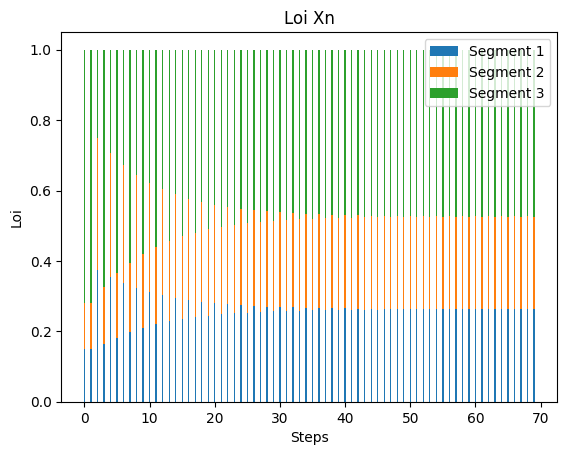

In [114]:
segment1 = np.zeros(70)
segment2 = np.zeros(70)
segment3 = np.zeros(70)
x = np.arange(70)
for i in range(70):
    segment1[i] = mu[i][0]
    segment2[i] = mu[i][1]
    segment3[i] = mu[i][2]
plt.bar(x, segment1, width=bar_width, label='Segment 1')
plt.bar(x, segment2, width=bar_width, bottom=segment1, label='Segment 2')
plt.bar(x, segment3, width=bar_width, bottom=segment1 + segment2, label='Segment 3')
plt.xlabel('Steps')
plt.ylabel('Loi')
plt.title('Loi Xn')
plt.legend()
plt.show()

Faites de même avec différents choix de loi initiale. Que constatez-vous ?
Encore convege à 0.263

In [125]:
loi = [0.3,0.5,0.2]
mu = []
for i in range(70):
    mu.append(LoiXn(P = P, n = i, loi = loi))
print(mu[69][0])

0.2630626254534877


Considérons $\mu_{100,0}$. Calculez $\mu_{100,0}P$ : 

In [128]:
# écrire votre code ici
loi = [0.3,0.5,0.2]
mu = []
for i in range(100):
    mu.append(LoiXn(P = P, n = i, loi = loi))
print(mu[99][0])

0.26315385616157316


- Que constatez-vous ? 
Convege vers 0.263
- Quel résultat cela illustre-il ? 
La limite reste la même pour different loi initiale

On considère maintenant la chaîne $(Z_n)_{n\in \mathbb{N}} $ sur $\{0,1,2,3,4\}$ de matrice de transition :
    $$P_a= \begin{pmatrix} 0  & 0.4 & 0   & 0.6 \\ 
                        0.3 & 0   & 0.7 & 0   \\ 
                         0  & 0.6 & 0   & 0.4  \\
                        0.2 & 0   & 0.8 & 0     
\end{pmatrix}$$

In [129]:
Pa = np.array([[0, 0.4, 0,0.6],
              [0.3, 0, 0.7,0],
              [0, 0.6, 0.0,0.4],
              [0.2, 0,0.8,0]])

- Calculer la loi de $Z_n$ pour $n$ grand et pair avec pour pour loi initiale 
$$\mu_0=(1~~0~~0~~0).$$
- Faites de même avec $n$ grand et impair. 

In [132]:
# écrire votre code ici
n_pair = 1000
n_impair = 505
mu_pair = LoiXn(P = Pa, n = n_pair, loi = [1,0,0,0])
mu_impair = LoiXn(P = Pa, n = n_impair, loi = [1,0,0,0])
print("pair:",mu_pair)
print("impair",mu_impair)


pair: [0.25490196 0.         0.74509804 0.        ]
impair [0.         0.54901961 0.         0.45098039]


In [133]:
n_pair = 2000
n_impair = 777
mu_pair = LoiXn(P = Pa, n = n_pair, loi = [1,0,0,0])
mu_impair = LoiXn(P = Pa, n = n_impair, loi = [1,0,0,0])
print("pair:",mu_pair)
print("impair",mu_impair)


pair: [0.25490196 0.         0.74509804 0.        ]
impair [0.         0.54901961 0.         0.45098039]


- Que constatez vous ? À quoi cela est-il dû ?  
Parce que il y a 2 classe dans le système

On considère maintenant le vecteur $$\mu=(0,1275~~0,2745~~0,3725~~0,2250)$$ et le produit $\mu P_a$ : 

In [134]:
mu=np.array([0.1275,0.2745, 0.3725,0.2255])
print("mu=",mu)
muP=np.dot(mu,Pa)
print("muP=",muP)

mu= [0.1275 0.2745 0.3725 0.2255]
muP= [0.12745 0.2745  0.37255 0.2255 ]


- Que constatez-vous ?
C'est presque la même donc $\mu$ peut être prèsque une mesure proba inv 
- Comparer le vecteur $\mu$ avec les distributions limites des sous-suites $(X_{2n})_{n\in\mathbb{N}}$ et $(X_{2n+1})_{n\in\mathbb{N}}$. Commentez
$$\mu \approx \frac{1}{2}(\mu_{pair}+\mu_{impair})$$ Et $\mu$ est combinaison linaire de $\mu_{pair}$ et $\mu_{impair}$

- Étudiez la convergence de distribution pour une chaîne qui comporte des états transitoires et une seule classe récurrente.
Il va converge à mesure proba inv de classe récurrente et les restes sont 0

In [ ]:
# écrire votre code ici


#### Remarque :
Pour éviter des calculs de puissance d'une grosse matrice, on pourrait laisser évoluer la chaine de Markov pendant un certain temps et *compter* la proportion du temps passé dans chaque état.

## 4- Application

France TV a lancé fin 2020 sa plate-forme de streaming, "Salto".
Ils devaient se faire une place entre Netflix et Disney+, les plus gros intervenant du secteur.

On suppose que la distribution des parts de marché est comme suit:

$$
\begin{array}{c|cccc}
Service & Netflix & Disney+ & Salto & SansAbonnement \\
\hline
parts \  de \  marché & .55 & .2 & .1 & .15
\end{array}
$$

Disney+ s'inquettent alors de l'évolution du marché s'ils ne font rien. Ils contactent une agence de publicité. L'agence leur indique qu'avec la campagne qu'elle leur propose, les abonnées des différentes plateforme passeront, chaque semaine d'une plateforme à l'autre selon ce qu'indique la matrice suivante : 

$$
\begin{array}{c|cccc}
 & Netflix & Disney+ & Salto & SansAbonnement \\
 \hline 
Netflix& 0.9262 & 0.0385 & 0.01&  0.0253 \\
Disney+&0.01& 0.94& 0.01& 0.04\\
Salto&0.01& 0.03& 0.92& 0.04\\
SansAbonnement&0.035& 0.035& 0.035& 0.895              
\end{array}
$$
C'est à dire qu'un usager de Netflix a 92.62 \% de chances de continuer à rester sur Netflix dans la semaine, 3,85\% de chances de passer chez Disney+, 1\% de chance de passer chez Salto etc.


### Exercice 6:

- Simuler le comportement de $N$ abonnées après trois semaines de campagne
- Calculer la loi $X_n$

In [ ]:
# écrire votre code ici
P = [[.9262,.0385,.01,.0253],
    [.01,.94,.01,.04],
    [.01,.03,.92,.04],
    [.035,.035,.035,.895]]
loi = [.55,.2,.1,.15]


## 5- Cas d'une chaine de Markov sur un espace infini.

Dans cette dernère partie, on s'intéresse à une chaine de Markov sur un espace d'état infini. 

### Exercice  7 : 
- Simuler la marche aléatoire (partant de 0) sur $\mathbb{N}$ à l'aide d'une suite de Rademacher:
$$
\mathbb{P}(X_n= 1)=p = 1-\mathbb{P}(X_n= -1).
$$

- Comparer les comportements de la chaine pour $p<1/2$, pour  $p>1/2$ et pour $p=1/2$.
- Représenter graphiquement ces 3 cas.

Pour simuler les v.a. de Rademacher, on peut (mais on n'est pas obligé) d'utiliser le conversion des boléens en entier : $$ True*1= 1~~\textrm{et}~~False*1 =0.$$

In [ ]:
# écrire votre code ici

### Modèle de Stock 

On considère l'exemple de l'exercice 5 de la feuille de TD 2. 
On pourra utiliser sans preuve les résultats de cet exercice. Vous trouverez une version corrigée de l'exercice ainsi que le sujet de TD sous moodle.

On note $X_n$ l'état d'un stock de pièces détachées à l'instant $n$, $D_{n+1}$ la demande (aléatoire) formulée par des clients, et on suppose qu'une seule pièce détachée est fabriquée entre les instants $n$ et $n+1$.

L'état du stock à l'instant $n+1$ est alors
$$X_{n+1} = \max(X_n + 1 - D_{n+1},0).$$


On suppose que $X_0 = 0$ (le stock est initialement vide) et que $(D_n)_{n \geq 1}$ est une suite de v.a. indépendantes et de même loi que $D$, une v.a. à valeurs dans $\{0,1,2\}$:

$$
\begin{array}{c|ccc}
D & 0 & 1 & 2 \\
\hline
\mathbb{P}(D=k) & p_0 & p_1 & p_2
\end{array}
$$

On suppose que les trois probabilités $p_0,p_1,p_2$ sont strictement positives, et $p_2 \ge p_1$.


### Exercice 9 :

- Simuler cette chaine de Markov (partant de 0)  pour différentes valeurs de $p_0,p_1,p_2$.


In [ ]:
# écrire votre code ici

- Étudier le cas $p_0=p_2$. 
- En question 5 de l'exercice 5, on montre que si $p_0 < p_2$,
$$
\mu(k) = \left(\frac{p_0}{p_2}\right)^k
$$
est une mesure invariante pour la chaine. 


- Comparer le vecteur des fréquences empiriques avec la probablité invariante.

In [ ]:
# écrire votre code ici

On définit la variable aléatoire: 

$$
T= \inf\{n \ge 1; X_n=0 \}.
$$

- Que représente $T$?

- Simuler une réalisation de T et afficher l'évolution de la chaîne au cours du temps.

In [ ]:
# écrire votre code ici

- Calculer numériquement $\mathbb{E}[T]$ pour $p_0<p_2$ 
- Comparer avec la valeur théorique.

In [ ]:
# écrire votre code ici